In [60]:
from create_features_DF import create_df, clean_data, create_features_df
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
import sklearn.metrics as skm
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model, X_test, y_true):
    '''Code stolen brazenly from sklearn example.'''
    cm = confusion_matrix(y_true, model.predict(X_test))

    print(cm)

    # Show confusion matrix in a separate window
    plt.matshow(cm)
    plt.title('Confusion matrix')
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [4]:
def roc_curve(probabilities, labels):
    '''
    INPUT: numpy array, numpy array
    OUTPUT: list, list, list

    Take a numpy array of the predicted probabilities and a numpy array of the
    true labels.
    Return the True Positive Rates, False Positive Rates and Thresholds for the
    ROC curve.
    '''

    thresholds = np.sort(probabilities)

    tprs = []
    fprs = []

    num_positive_cases = sum(labels)
    num_negative_cases = len(labels) - num_positive_cases

    for threshold in thresholds:
        # With this threshold, give the prediction of each instance
        predicted_positive = probabilities >= threshold
        # Calculate the number of correctly predicted positive cases
        true_positives = np.sum(predicted_positive * labels)
        # Calculate the number of incorrectly predicted positive cases
        false_positives = np.sum(predicted_positive) - true_positives
        # Calculate the True Positive Rate
        tpr = true_positives / float(num_positive_cases)
        # Calculate the False Positive Rate
        fpr = false_positives / float(num_negative_cases)

        fprs.append(fpr)
        tprs.append(tpr)
    
    return tprs, fprs, thresholds.tolist()

def plot_roc(probs, y_true, title, xlabel, ylabel):
    # ROC
    tpr, fpr, thresholds = roc_curve(probs, y_test)

    plt.hold(True)
    plt.plot(fpr, tpr)

    # 45 degree line
    xx = np.linspace(0, 1.0, 20)
    plt.plot(xx, xx, color='red')

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    plt.show()

In [5]:
df = create_df('data/data.json')

In [6]:
df = clean_data(df)

In [7]:
X = create_features_df(df)

In [8]:
y = df['fraud'].values

In [9]:
X.head()

,user_type_1,user_type_2,user_type_3,user_type_4,user_type_5,channels_0,channels_4,channels_5,channels_6,channels_7,channels_8,channels_9,channels_10,channels_11,channels_12,delivery_0.0,delivery_1.0,num_prev_payouts
0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,49
2,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,36
3,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,21
4,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,49


In [ ]:
X.describe().T

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=67)

In [43]:
rfc = RandomForestClassifier(n_estimators=20, oob_score=True)
rfc.fit(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [44]:
rfc.score(X_test, y_test)

0.9766387726638772

In [47]:
rfc.oob_score_

0.9762838957188944

In [48]:
skm.roc_auc_score(y_test, rfc.predict(X_test))

0.9064808872653074

[[2570   16]
 [  51  231]]


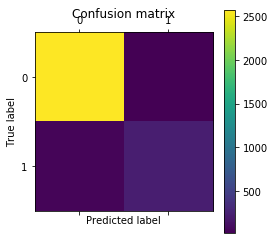

In [49]:
plot_confusion_matrix(rfc, X_test, y_test)

In [50]:
rfc.predict_proba(X_test)

array([[0.90386104, 0.09613896],
       [1.        , 0.        ],
       [0.97012409, 0.02987591],
       ...,
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ]])

In [67]:
rfc.feature_importances_

array([5.02741626e-02, 3.68973086e-05, 9.20233445e-03, 6.70444873e-03,
       3.28762860e-04, 1.30090714e-02, 1.01291636e-03, 3.17260239e-03,
       4.05255561e-03, 1.00426404e-04, 7.75992491e-03, 8.05780113e-05,
       3.90825742e-04, 2.46356683e-03, 1.26395054e-03, 1.80551545e-02,
       1.61322742e-02, 8.65959547e-01])

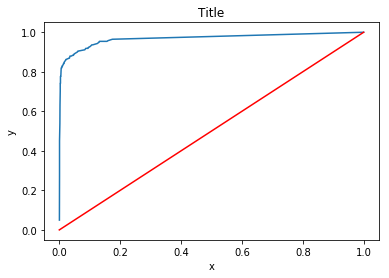

In [61]:
v_probs = rfc.predict_proba(X_test)[:,1]
plot_roc(v_probs, y_test, "Title", "x", "y")
plt.show()

In [26]:
from sklearn.model_selection import GridSearchCV

In [28]:
rfc.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 20,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [55]:
param_grid = [
  {'n_estimators': [10, 20, 30, 50, 70, 100], 'max_depth': [7,9,11,13], 
   'min_samples_split': [2,4,8]}]

In [56]:
clf = GridSearchCV(rfc, param_grid, cv=5,
                       scoring='recall')

In [62]:
clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [10, 20, 30, 50, 70, 100], 'max_depth': [7, 9, 11, 13], 'min_samples_split': [2, 4, 8]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=0)

In [58]:
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']

In [59]:
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

0.751 (+/-0.053) for {'max_depth': 7, 'min_samples_split': 2, 'n_estimators': 10}
0.752 (+/-0.047) for {'max_depth': 7, 'min_samples_split': 2, 'n_estimators': 20}
0.754 (+/-0.048) for {'max_depth': 7, 'min_samples_split': 2, 'n_estimators': 30}
0.753 (+/-0.047) for {'max_depth': 7, 'min_samples_split': 2, 'n_estimators': 50}
0.753 (+/-0.047) for {'max_depth': 7, 'min_samples_split': 2, 'n_estimators': 70}
0.753 (+/-0.047) for {'max_depth': 7, 'min_samples_split': 2, 'n_estimators': 100}
0.754 (+/-0.051) for {'max_depth': 7, 'min_samples_split': 4, 'n_estimators': 10}
0.755 (+/-0.044) for {'max_depth': 7, 'min_samples_split': 4, 'n_estimators': 20}
0.753 (+/-0.046) for {'max_depth': 7, 'min_samples_split': 4, 'n_estimators': 30}
0.756 (+/-0.045) for {'max_depth': 7, 'min_samples_split': 4, 'n_estimators': 50}
0.755 (+/-0.047) for {'max_depth': 7, 'min_samples_split': 4, 'n_estimators': 70}
0.754 (+/-0.046) for {'max_depth': 7, 'min_samples_split': 4, 'n_estimators': 100}
0.755 (+/-0.04

In [63]:
clf.best_params_

{'max_depth': 13, 'min_samples_split': 8, 'n_estimators': 30}